In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold_percentage(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    if n is None:
        n = df.shape[0]
    print(f"n= {n}")
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [3]:
def filter_with_threshold_count(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    count_column_name = column_name + "_count"
    filtered_count_df = count_df[count_df[count_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [4]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - EMBL mapping Dataset Generation


### input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata.csv

In [5]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata.csv")
df = pd.read_csv(file_path)
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank
0,UniRef90_A0A159B6I9,1647470,AKJ72124.1,['Gordonia malaquae strain BEN700'],Gordonia malaquae strain BEN700,Gordonia phage GMA1,species,0,NaN
1,UniRef90_A0A386AT53,151340,AYC54495.1,['Homo sapiens'],Homo sapiens,Papillomaviridae,family,9606,species
2,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species
3,UniRef90_A0A023HQ45,10941,AGO66954.2,['Homo sapiens; sex: M; age: 7 months'],Homo sapiens,Human rotavirus A,no rank,9606,species
4,UniRef90_A0A9Y1HTB6,2968691,WAX17359.1,['Parabacteroides merdae BSC93'],Parabacteroides merdae BSC93,Parabacteroides phage PM93P1,species,0,NaN
...,...,...,...,...,...,...,...,...,...
618956,UniRef90_Q8AYW8,221054,CAD27705.1,['Eupatorium makinoi'],Eupatorium makinoi,Eupatorium yellow vein betasatellite,species,103754,species
618957,UniRef90_Q8AZL8,10993,CAD30691.1,['Blotched Snakehead fish'],Blotched Snakehead fish,Birnaviridae,family,0,NaN
618958,UniRef90_Q8AZL9,311176,CAD30690.1,['Blotched Snakehead fish'],Blotched Snakehead fish,Blotched snakehead virus,no rank,0,NaN
618959,UniRef90_Q8AZM0,311176,CAD30689.1,['Blotched Snakehead fish'],Blotched Snakehead fish,Blotched snakehead virus,no rank,0,NaN


In [8]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_name")

Number of unique values = 17033
                           virus_name  virus_name_count  virus_name_percent
0      Human immunodeficiency virus 1            216611           50.269319
1                 Hepacivirus hominis             11007            2.554415
2         Prokaryotic dsDNA virus sp.             10968            2.545364
3                   Hepatitis B virus             10241            2.376648
4        Human immunodeficiency virus              2097            0.486655
...                               ...               ...                 ...
17028         Pigeon pea latent virus                 1            0.000232
17029      Howler monkey adenovirus 1                 1            0.000232
17030                Cardiovirus 05VZ                 1            0.000232
17031                  Kobuvirus 05VZ                 1            0.000232
17032                  Kobuvirus BS14                 1            0.000232

[17033 rows x 3 columns]


,virus_name,virus_name_count,virus_name_percent
0,Human immunodeficiency virus 1,216611,50.269319
1,Hepacivirus hominis,11007,2.554415
2,Prokaryotic dsDNA virus sp.,10968,2.545364
3,Hepatitis B virus,10241,2.376648
4,Human immunodeficiency virus,2097,0.486655
...,...,...,...
17028,Pigeon pea latent virus,1,0.000232
17029,Howler monkey adenovirus 1,1,0.000232
17030,Cardiovirus 05VZ,1,0.000232
17031,Kobuvirus 05VZ,1,0.000232


In [9]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_host_name")

Number of unique values = 8833
                                    virus_host_name  virus_host_name_count  \
0                                      Homo sapiens                 247415   
1                                          Bacteria                  11040   
2                                  Acanthamoeba sp.                   5746   
3                            Acanthamoeba polyphaga                   2395   
4                            Vermamoeba vermiformis                   2160   
...                                             ...                    ...   
8828                                        Valensi                      1   
8829                                    Lemur catta                      1   
8830                           Bougainvillea glabra                      1   
8831                               Eremopoa persica                      1   
8832  Vitis vinifera cv. Cabernet Franc (grapevine)                      1   

      virus_host_name_percent  


,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,247415,57.418061
1,Bacteria,11040,2.562073
2,Acanthamoeba sp.,5746,1.333485
3,Acanthamoeba polyphaga,2395,0.555812
4,Vermamoeba vermiformis,2160,0.501275
...,...,...,...
8828,Valensi,1,0.000232
8829,Lemur catta,1,0.000232
8830,Bougainvillea glabra,1,0.000232
8831,Eremopoa persica,1,0.000232


### uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv

In [34]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv")

In [35]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

### Deduplicate: Remove duplicates, retain the first occurence
#### TODO: Investigate the presence of 5 duplicate records

In [36]:
df = df[~df.duplicated()]

In [37]:
print("df size = ", df.shape)
df.head()

df size =  (267860, 11)


,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEELLRVVRIIKQIYQSNPPPNPEGTRQARRNRRRRWR...,116
1,UniRef90_L0BZL1,11676,AFZ96186.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,EXEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKRTQ...,199
2,UniRef90_D6NXI9,11676,ADF86161.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEXLLRTIRLIRILYQSNPPPSSKGTRQARRNRRRRWR...,94
3,UniRef90_A0A023HQ48,28875,AGO66969.1,['Homo sapiens'],Homo sapiens,Rotavirus A,species,9606,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_L0BZL4,11676,AFZ95585.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,377


In [38]:
column_stats(df, "virus_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_virus.csv"))

Number of unique values = 3779
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            215415           80.420742
1                                   Hepacivirus hominis             10947            4.086836
2                                     Hepatitis B virus             10152            3.790040
3                          Human immunodeficiency virus              2095            0.782125
4                                  Human papillomavirus              1078            0.402449
5                   Simian-Human immunodeficiency virus              1030            0.384529
6                        Human immunodeficiency virus 2               788            0.294184
7                                           Rotavirus A               749            0.279624
8                                         Riboviria sp.               563            0.210184
9                         Sim

In [39]:
column_stats(df, "virus_host_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_virus_host.csv"))

Number of unique values = 1314
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                 247413                92.366535
1                                            Sus scrofa                   1286                 0.480102
2                                        Macaca mulatta                   1081                 0.403569
3                             Hydrochoerus hydrochaeris                    627                 0.234078
4                                    Marmota himalayana                    539                 0.201225
5                                         Gallus gallus                    484                 0.180691
6                                           Felis catus                    441                 0.164638
7                                       Cyprinus carpio                    411                 0.153438
8                                

min seq len = 11
max seq len = 8249


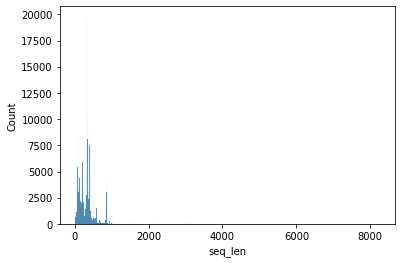

     start     end   count  percentage
0     11.0   697.5  246481   92.018592
1    697.5  1384.0   19558    7.301575
2   1384.0  2070.5     533    0.198985
3   2070.5  2757.0     552    0.206078
4   2757.0  3443.5     604    0.225491
5   3443.5  4130.0      57    0.021280
6   4130.0  4816.5      16    0.005973
7   4816.5  5503.0       6    0.002240
8   5503.0  6189.5       6    0.002240
9   6189.5  6876.0      18    0.006720
10  6876.0  7562.5      22    0.008213
11  7562.5  8249.0       7    0.002613


In [40]:
print_seq_len_histogram(df, 12)

## Non - Immunodeficiency Virus

In [41]:
virus_names = list(df["virus_name"].unique())
print(f"Number of unique viruses = {len(virus_names)}")
virus_names

Number of unique viruses = 3779


['Human immunodeficiency virus 1',
 'Rotavirus A',
 'Rhinovirus B',
 'Orthohantavirus puumalaense',
 'Hantavirus sp.',
 'Vientovirus',
 'Rhinovirus A',
 'Cencurut virus',
 'Hepatitis B virus',
 'Rhinovirus C',
 'Avian coronavirus',
 'Nyangole orthobunyavirus',
 'Betacoronavirus 1',
 'Feline leukemia virus',
 'Sapporo virus',
 'Paslahepevirus balayani',
 'Hepacivirus hominis',
 'Human papillomavirus',
 'Mastomys natalensis cytomegalovirus 2',
 'Mastomys natalensis cytomegalovirus 1',
 'Parechovirus A',
 'Macaca mulatta papillomavirus 5',
 'Macaca mulatta papillomavirus 7',
 'Macaca mulatta papillomavirus 6',
 'Betanodavirus sp.',
 'Enterovirus B',
 'Mammarenavirus loeiense',
 'Human rhinovirus sp.',
 'Penguin herpesvirus 2',
 'Volepox virus',
 'Skunkpox virus',
 'Chikungunya virus',
 'Paramyxovirus A69-1',
 'Paramyxovirus C40',
 'Paramyxovirus A69-2',
 'Orthonairovirus haemorrhagiae',
 'Lonchura striata deltavirus',
 'Herpesvirus DDDp',
 'Feline immunodeficiency virus',
 'Peromyscus leu

In [42]:
idv_names = list(filter(lambda x: "immunodeficiency" in x.lower(), virus_names))

In [43]:
idv_names

['Human immunodeficiency virus 1',
 'Feline immunodeficiency virus',
 'Simian immunodeficiency virus',
 'Human immunodeficiency virus',
 'Human immunodeficiency virus 2',
 'Simian-Human immunodeficiency virus',
 'Bovine immunodeficiency virus']

In [44]:
non_idv_df = df[~df["virus_name"].isin(idv_names)]
non_idv_df.shape

(47792, 11)

In [45]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
# non_idv_df.to_csv(output_file_path, index=False)

In [46]:
non_idv_df = pd.read_csv(output_file_path)
non_idv_df.shape

(47792, 11)

In [47]:
column_stats(non_idv_df, "virus_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_nonidv_virus.csv"))

Number of unique values = 3772
                                             virus_name  virus_name_count  virus_name_percent
0                                   Hepacivirus hominis             10947           22.905507
1                                     Hepatitis B virus             10152           21.242049
2                                  Human papillomavirus              1078            2.255608
3                                           Rotavirus A               749            1.567208
4                                         Riboviria sp.               563            1.178021
5                                 Marmot picobirnavirus               529            1.106880
6                               Paslahepevirus balayani               431            0.901825
7                                     Bacteriophage sp.               411            0.859977
8                                 Hepatitis delta virus               400            0.836960
9                            

In [48]:
column_stats(non_idv_df, "virus_host_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_nonidv_virus_host.csv"))

Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8                                

min seq len = 11
max seq len = 8249


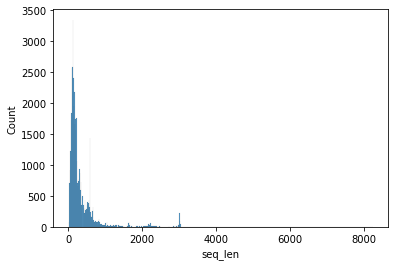

     start     end  count  percentage
0     11.0   697.5  44007   92.080264
1    697.5  1384.0   1967    4.115752
2   1384.0  2070.5    530    1.108972
3   2070.5  2757.0    552    1.155005
4   2757.0  3443.5    604    1.263810
5   3443.5  4130.0     57    0.119267
6   4130.0  4816.5     16    0.033478
7   4816.5  5503.0      6    0.012554
8   5503.0  6189.5      6    0.012554
9   6189.5  6876.0     18    0.037663
10  6876.0  7562.5     22    0.046033
11  7562.5  8249.0      7    0.014647


In [49]:
print_seq_len_histogram(non_idv_df, 12)

**Number of host classes**

In [11]:
# 1% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 1)

Size of df = (47792, 11)
n= 47792
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535

min seq len = 11
max seq len = 7217


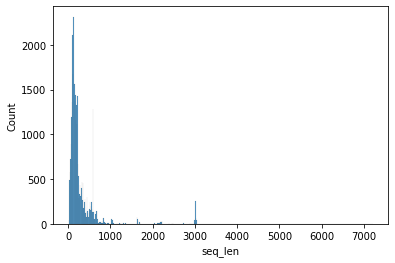

     start     end  count  percentage
0     11.0   611.5  29528   93.095403
1    611.5  1212.0   1159    3.654077
2   1212.0  1812.5    291    0.917460
3   1812.5  2413.0    218    0.687307
4   2413.0  3013.5    342    1.078252
5   3013.5  3614.0    162    0.510751
6   3614.0  4214.5      6    0.018917
7   4214.5  4815.0      5    0.015764
8   4815.0  5415.5      0    0.000000
9   5415.5  6016.0      0    0.000000
10  6016.0  6616.5      2    0.006306
11  6616.5  7217.0      5    0.015764


In [12]:
print_seq_len_histogram(filtered_df, 12)

In [13]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
# filtered_df.to_csv(output_file_path, index=False)

**Sequence Length Parameters**

In [14]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99.9])

array([ 591.   ,  710.   , 3036.283])

min seq len = 11
max seq len = 7217


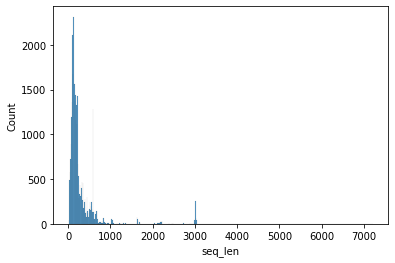

     start     end  count  percentage
0     11.0   611.5  29528   93.095403
1    611.5  1212.0   1159    3.654077
2   1212.0  1812.5    291    0.917460
3   1812.5  2413.0    218    0.687307
4   2413.0  3013.5    342    1.078252
5   3013.5  3614.0    162    0.510751
6   3614.0  4214.5      6    0.018917
7   4214.5  4815.0      5    0.015764
8   4815.0  5415.5      0    0.000000
9   5415.5  6016.0      0    0.000000
10  6016.0  6616.5      2    0.006306
11  6616.5  7217.0      5    0.015764


In [15]:
print_seq_len_histogram(filtered_df, 12)

In [16]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 3036]
seq_len_filtered_df.shape

(31686, 11)

In [17]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 5
             virus_host_name  virus_host_name_count  virus_host_name_percent
0               Homo sapiens                  28760                90.765638
1                 Sus scrofa                   1281                 4.042795
2  Hydrochoerus hydrochaeris                    627                 1.978792
3         Marmota himalayana                    539                 1.701067
4              Gallus gallus                    479                 1.511709


,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,28760,90.765638
1,Sus scrofa,1281,4.042795
2,Hydrochoerus hydrochaeris,627,1.978792
3,Marmota himalayana,539,1.701067
4,Gallus gallus,479,1.511709


In [18]:
column_stats(seq_len_filtered_df, "virus_name")

Number of unique values = 660
                                            virus_name  virus_name_count  virus_name_percent
0                                  Hepacivirus hominis             10919           34.460014
1                                    Hepatitis B virus             10120           31.938396
2                                 Human papillomavirus              1078            3.402133
3                                          Rotavirus A               629            1.985104
4                                Marmot picobirnavirus               529            1.669507
5                                    Bacteriophage sp.               411            1.297103
6                                Hepatitis delta virus               400            1.262387
7                              Paslahepevirus balayani               380            1.199268
8                                    Torque teno virus               363            1.145616
9                              Human bet

,virus_name,virus_name_count,virus_name_percent
0,Hepacivirus hominis,10919,34.460014
1,Hepatitis B virus,10120,31.938396
2,Human papillomavirus,1078,3.402133
3,Rotavirus A,629,1.985104
4,Marmot picobirnavirus,529,1.669507
5,Bacteriophage sp.,411,1.297103
6,Hepatitis delta virus,400,1.262387
7,Paslahepevirus balayani,380,1.199268
8,Torque teno virus,363,1.145616
9,Human betaherpesvirus 6,295,0.931011


In [30]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
# seq_len_filtered_df.to_csv(output_file_path, index=False)

### Non Immunodeficiency Virus, hosts with < 1% prevalence in the dataset

In [19]:
hosts_with_one_percent_prevalence = seq_len_filtered_df["virus_host_name"].unique().tolist()
hosts_with_one_percent_prevalence

['Homo sapiens',
 'Sus scrofa',
 'Gallus gallus',
 'Marmota himalayana',
 'Hydrochoerus hydrochaeris']

In [20]:
non_idv_less_than_one_percent_prevalence_df = non_idv_df[~non_idv_df["virus_host_name"].isin(hosts_with_one_percent_prevalence)]
non_idv_less_than_one_percent_prevalence_df.shape

(16074, 11)

In [21]:
non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence.csv"))
non_idv_less_than_one_percent_prevalence_df.shape

(16074, 12)

In [22]:
np.percentile(non_idv_less_than_one_percent_prevalence_df["seq_len"].values, [90, 95, 99])

array([ 840.7 , 1446.  , 3025.27])

min seq len = 11
max seq len = 8249


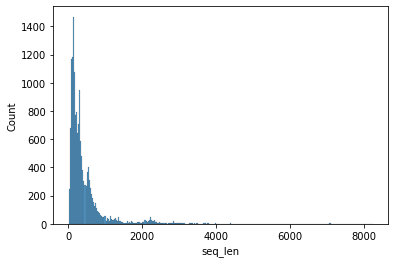

     start     end  count  percentage
0     11.0   697.5  13885   86.381734
1    697.5  1384.0   1340    8.336444
2   1384.0  2070.5    269    1.673510
3   2070.5  2757.0    339    2.108996
4   2757.0  3443.5    127    0.790096
5   3443.5  4130.0     51    0.317283
6   4130.0  4816.5     11    0.068433
7   4816.5  5503.0      6    0.037327
8   5503.0  6189.5      6    0.037327
9   6189.5  6876.0     15    0.093318
10  6876.0  7562.5     18    0.111982
11  7562.5  8249.0      7    0.043549


In [23]:
print_seq_len_histogram(non_idv_less_than_one_percent_prevalence_df, 12)

In [24]:
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df = non_idv_less_than_one_percent_prevalence_df[non_idv_less_than_one_percent_prevalence_df["seq_len"] <= 3025]
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.shape

(15913, 12)

In [43]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence_seq_len_in_99percentile.csv")
# non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.to_csv(output_file_path)

#### Non-IDV with host prevalence < 1%, >=0.05%

In [6]:
filtered_df = filter_with_threshold_percentage(non_idv_less_than_one_percent_prevalence_df, "virus_host_name", 0.05, n=47792)

Size of df = (16074, 12)
n= 47792
Number of unique values = 1299
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                       Cyprinus carpio                    411                 0.859977
1                                    Petroica australis                    408                 0.853699
2                                           Felis catus                    298                 0.623535
3                                     Gopherus morafkai                    292                 0.610981
4                                     Peromyscus boylii                    282                 0.590057
5                                  Marmota flaviventris                    271                 0.567041
6                                            Bos taurus                    257                 0.537747
7                                      Eptesicus fuscus                    255                 0.533562

min seq len = 11
max seq len = 8108


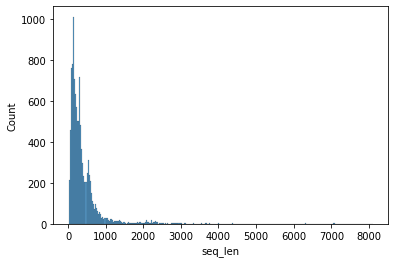

      start      end  count  percentage
0     11.00   685.75  10022   89.251046
1    685.75  1360.50    815    7.257993
2   1360.50  2035.25    148    1.318016
3   2035.25  2710.00    148    1.318016
4   2710.00  3384.75     49    0.436370
5   3384.75  4059.50     21    0.187016
6   4059.50  4734.25      7    0.062339
7   4734.25  5409.00      1    0.008906
8   5409.00  6083.75      1    0.008906
9   6083.75  6758.50      6    0.053433
10  6758.50  7433.25      9    0.080150
11  7433.25  8108.00      2    0.017811


In [8]:
filtered_df.shape
print_seq_len_histogram(filtered_df, 12)

In [38]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence.csv")
# filtered_df.to_csv(output_file_path)

In [11]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99])

array([ 716.  , 1068.8 , 2451.96])

In [12]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 2452]
seq_len_filtered_df.shape

(11116, 12)

In [13]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 143
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                 Cyprinus carpio                    410                 3.688377
1              Petroica australis                    408                 3.670385
2                     Felis catus                    297                 2.671824
3               Gopherus morafkai                    292                 2.626844
4               Peromyscus boylii                    282                 2.536884
5            Marmota flaviventris                    271                 2.437927
6                      Bos taurus                    256                 2.302987
7                Eptesicus fuscus                    254                 2.284995
8                  Macaca mulatta                    232                 2.087082
9              Loxodonta africana                    213                 1.916157
10            Mastomys natalensis                    207            

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Cyprinus carpio,410,3.688377
1,Petroica australis,408,3.670385
2,Felis catus,297,2.671824
3,Gopherus morafkai,292,2.626844
4,Peromyscus boylii,282,2.536884
5,Marmota flaviventris,271,2.437927
6,Bos taurus,256,2.302987
7,Eptesicus fuscus,254,2.284995
8,Macaca mulatta,232,2.087082
9,Loxodonta africana,213,1.916157


In [14]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence_seq_len_in_99prcntile.csv")
#seq_len_filtered_df.to_csv(output_file_path, index=False)

#### Non Immunodeficiency Virus, hosts with >= 0.05% prevalence in the dataset

In [25]:
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.05, n=47792)

Size of df = (47792, 11)
n= 47792
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535

In [26]:
column_stats(filtered_df, "virus_host_name")

Number of unique values = 148
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                  28782                67.017487
1                      Sus scrofa                   1286                 2.994388
2       Hydrochoerus hydrochaeris                    627                 1.459939
3              Marmota himalayana                    539                 1.255035
4                   Gallus gallus                    484                 1.126970
5                 Cyprinus carpio                    411                 0.956994
6              Petroica australis                    408                 0.950008
7                     Felis catus                    298                 0.693879
8               Gopherus morafkai                    292                 0.679908
9               Peromyscus boylii                    282                 0.656623
10           Marmota flaviventris                    271            

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,28782,67.017487
1,Sus scrofa,1286,2.994388
2,Hydrochoerus hydrochaeris,627,1.459939
3,Marmota himalayana,539,1.255035
4,Gallus gallus,484,1.126970
5,Cyprinus carpio,411,0.956994
6,Petroica australis,408,0.950008
7,Felis catus,298,0.693879
8,Gopherus morafkai,292,0.679908
9,Peromyscus boylii,282,0.656623


In [27]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence.csv")
filtered_df.to_csv(output_file_path, index=False)

In [28]:
filtered_df.shape

(42947, 11)

**Back to number of host classes**

In [89]:
# 0.7% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.7)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [90]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [91]:
# 0.5% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.5)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [92]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)

## Immunodeficiency Virus

In [16]:
idv_df = df[df["virus_name"].isin(idv_names)]
idv_df.shape

(220068, 11)

In [15]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
# idv_df.to_csv(output_file_path, index=False)
idv_df = pd.read_csv(output_file_path)